# Data Cleaning 

In [1]:
# loading relavent libraries
import pandas as pd
import numpy as np
import random
import math
import pickle
import csv
import decimal
import re
import matplotlib.pyplot as plt
from plotnine import *
from tqdm import tqdm

import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing, manifold
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import axes3d
import ipywidgets as widgets
from IPython.display import display

plt.style.use('ggplot')
pd.options.mode.chained_assignment = None

## Data Import (Reformated data generated by unzip.Rmd) 

####  Data load + clean + train/test split

In [2]:
# load reformated_data.csv (output of 'unzip_mat_file.Rmd')
df = pd.read_csv ('./data/reformated_data.csv')
df = df.drop(df.columns[0], axis=1)

# dropping unknown diagnosis dx = 0
df = df[df["dx"] > 0]

# putting diagnosis 3 and 4 into the Alzheimers group
df.loc[df['dx'] == 3, 'dx'] = 2
df.loc[df['dx'] == 4, 'dx'] = 2

# changing required columns to numeric
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# max and min age of available patient data with Alzheimers and without
# drops young patients 
minimum = (max(min(df[df["dx"] == 1]["age"]),min(df[df["dx"] == 2]["age"])))
maximum = (min(max(df[df["dx"] == 1]["age"]),max(df[df["dx"] == 2]["age"])))
df = df.loc[(df["age"] >= minimum-0.01) & (df["age"] <= maximum+0.01)]

# split diagnosis and rest of data
diag = pd.DataFrame(df["dx"])
meas = df.loc[:, df.columns != 'dx']

# training and testing split (80-20) stratified on diagnosis
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(meas, diag, random_state = 749, test_size=0.2, stratify= diag)

# add 'train' & 'test' lables 
x_train['group'] = "train"
x_test['group'] = "test"

# recombined data
df = pd.concat((pd.concat([x_test, y_test], axis=1),pd.concat([x_train, y_train], axis=1)), axis=0)

In [3]:
# name of columns to be added to every group 
inserter = ['age', 'dx', 'group']

# getting measures related to each brain bundle
# filter_bx relates to bundle #x
filter_b1 = df[inserter + [col for col in df if col.startswith('b1_')]]
filter_b2 = df[inserter + [col for col in df if col.startswith('b2_')]]
filter_b3 = df[inserter + [col for col in df if col.startswith('b3_')]]
filter_b4 = df[inserter + [col for col in df if col.startswith('b4_')]]
filter_b5 = df[inserter + [col for col in df if col.startswith('b5_')]]
filter_b6 = df[inserter + [col for col in df if col.startswith('b6_')]]
filter_b7 = df[inserter + [col for col in df if col.startswith('b7_')]]
filter_b8 = df[inserter + [col for col in df if col.startswith('b8_')]]
filter_b9 = df[inserter + [col for col in df if col.startswith('b9_')]]
filter_b10 = df[inserter + [col for col in df if col.startswith('b10_')]]

filter_b11 = df[inserter + [col for col in df if col.startswith('b11_')]]
filter_b12 = df[inserter + [col for col in df if col.startswith('b12_')]]
filter_b13 = df[inserter + [col for col in df if col.startswith('b13_')]]
filter_b14 = df[inserter + [col for col in df if col.startswith('b14_')]]
filter_b15 = df[inserter + [col for col in df if col.startswith('b15_')]]
filter_b16 = df[inserter + [col for col in df if col.startswith('b16_')]]
filter_b17 = df[inserter + [col for col in df if col.startswith('b17_')]]
filter_b18 = df[inserter + [col for col in df if col.startswith('b18_')]]
filter_b19 = df[inserter + [col for col in df if col.startswith('b19_')]]
filter_b20 = df[inserter + [col for col in df if col.startswith('b20_')]]

filter_b21 = df[inserter + [col for col in df if col.startswith('b21_')]]
filter_b22 = df[inserter + [col for col in df if col.startswith('b22_')]]
filter_b23 = df[inserter + [col for col in df if col.startswith('b23_')]]
filter_b24 = df[inserter + [col for col in df if col.startswith('b24_')]]
filter_b25 = df[inserter + [col for col in df if col.startswith('b25_')]]
filter_b26 = df[inserter + [col for col in df if col.startswith('b26_')]]
filter_b27 = df[inserter + [col for col in df if col.startswith('b27_')]]
filter_b28 = df[inserter + [col for col in df if col.startswith('b28_')]]
filter_b29 = df[inserter + [col for col in df if col.startswith('b29_')]]
filter_b30 = df[inserter + [col for col in df if col.startswith('b30_')]]

filter_b31 = df[inserter + [col for col in df if col.startswith('b31_')]]
filter_b32 = df[inserter + [col for col in df if col.startswith('b32_')]]
filter_b33 = df[inserter + [col for col in df if col.startswith('b33_')]]
filter_b34 = df[inserter + [col for col in df if col.startswith('b34_')]]
filter_b35 = df[inserter + [col for col in df if col.startswith('b35_')]]
filter_b36 = df[inserter + [col for col in df if col.startswith('b36_')]]
filter_b37 = df[inserter + [col for col in df if col.startswith('b37_')]]
filter_b38 = df[inserter + [col for col in df if col.startswith('b38_')]]
filter_b39 = df[inserter + [col for col in df if col.startswith('b39_')]]
filter_b40 = df[inserter + [col for col in df if col.startswith('b40_')]]

filter_b41 = df[inserter + [col for col in df if col.startswith('b41_')]]
filter_b42 = df[inserter + [col for col in df if col.startswith('b42_')]]
filter_b43 = df[inserter + [col for col in df if col.startswith('b43_')]]
filter_b44 = df[inserter + [col for col in df if col.startswith('b44_')]]
filter_b45 = df[inserter + [col for col in df if col.startswith('b45_')]]
filter_b46 = df[inserter + [col for col in df if col.startswith('b46_')]]
filter_b47 = df[inserter + [col for col in df if col.startswith('b47_')]]
filter_b48 = df[inserter + [col for col in df if col.startswith('b48_')]]
filter_b49 = df[inserter + [col for col in df if col.startswith('b49_')]]

In [4]:
# combine the now correctly labeled bundle/measure data
all_bundles = (filter_b1, filter_b2, filter_b3, filter_b4, filter_b5,
         filter_b6, filter_b7, filter_b8, filter_b9, filter_b10,
         filter_b11, filter_b12, filter_b13, filter_b14, filter_b15,
         filter_b16, filter_b17, filter_b18, filter_b19, filter_b20,
         filter_b21, filter_b22, filter_b23, filter_b24, filter_b25,
         filter_b26, filter_b27, filter_b28, filter_b29, filter_b30,
         filter_b31, filter_b32, filter_b33, filter_b34, filter_b35,
         filter_b36, filter_b37, filter_b38, filter_b39, filter_b40,
         filter_b41, filter_b42, filter_b43, filter_b44, filter_b45,
         filter_b46, filter_b47, filter_b48, filter_b49)

# delete the helper dfs
del (inserter, filter_b1, filter_b2, filter_b3, filter_b4, filter_b5, filter_b6, filter_b7, filter_b8, filter_b9, filter_b10,
filter_b11, filter_b12, filter_b13, filter_b14, filter_b15, filter_b16, filter_b17, filter_b18, filter_b19, filter_b20,
filter_b21, filter_b22, filter_b23, filter_b24, filter_b25, filter_b26, filter_b27, filter_b28, filter_b29, filter_b30,
filter_b31, filter_b32, filter_b33, filter_b34, filter_b35, filter_b36, filter_b37, filter_b38, filter_b39, filter_b40,
filter_b41, filter_b42, filter_b43, filter_b44, filter_b45, filter_b46, filter_b47, filter_b48, filter_b49)

## Z Score Normalization

In [5]:
# initialize noramlizer and imputer
scaler = StandardScaler()
imput = SimpleImputer(missing_values=np.nan, strategy='mean')

# initilize empty lists 
all_figures_std = [list(),list(),list()]
bundle_measures_std = [list()]
comb_df = list()

# loop through all_bundles (loops through each bundle)
for bundle in tqdm(all_bundles):
    # loop through all meassuers (loop through each bundles measures)
    for i in range(3,34):
        # on first iteration for each bundle get the non-normalized data frame
        if (i == 3):
            comb_df = bundle.copy() 
            
        # get the column name
        label = bundle.columns[i]
        # seperate train & test data
        train_copy = bundle[bundle["group"] == "train"].copy()
        test_copy = bundle[bundle["group"] == "test"].copy()
        # imput training set unknowns to training set mean 
        # imput test set unknowns from training set mean (no data leakage)
        train_copy[label] = imput.fit_transform(train_copy[label].values.reshape(-1,1))
        test_copy[label]  = imput.transform(test_copy[label].values.reshape(-1,1))
        # z-score normalization for training set using training set
        # apply same z-score normalization to test set (no data leakage)
        train_copy[label] = scaler.fit_transform(train_copy[label].values.reshape(-1,1))
        test_copy[label] = scaler.transform(test_copy[label].values.reshape(-1,1))
        # recombine train & test sets
        train_test = pd.concat([train_copy, test_copy], axis=0)
        comb_df[label] = train_test[label]

        # if last measure in bundle append it to bundle measures standardized list
        if (i == 32):
            bundle_measures_std[0].append(comb_df)
                   
        # calculating and plotting standardized bundle/measure differences
        # seperate Alzheimers and non Alzhiemers scans
        x1 = train_test[train_test["dx"] == 1]["age"]
        x2 = train_test[train_test["dx"] == 2]["age"]
        y1 = train_test[train_test["dx"] == 1][label]
        y2 = train_test[train_test["dx"] == 2][label]
        # linear fit 
        z1 = np.polyfit(x1, y1, 1)
        z2 = np.polyfit(x2, y2, 1)
        y_hat1 = np.poly1d(z1)(x1)
        y_hat2 = np.poly1d(z2)(x2)
    
        # create scatter plot of Alz & Non scans
        temp_fig = plt.figure()
        plt.scatter(x1, y1, c = "lightblue", alpha = 0.5)
        plt.plot(x1, y_hat1, "b-", lw=2)
        plt.scatter(x2, y2, c = "darkred", alpha = 0.3)
        plt.plot(x2, y_hat2, "r-", lw=2)
        # save the label name (b#_V#) and the image
        all_figures_std[0].append(label)
        all_figures_std[1].append(temp_fig)
        plt.close(temp_fig)
        
        # calculate the difference between the figure lines
        x3 = x1.append(x2)
        y_h_1 = np.poly1d(z1)(x3)
        y_h_2 = np.poly1d(z2)(x3)
        diff = sum(abs(y_h_1-y_h_2))/len(y_h_2)
        # append differences
        all_figures_std[2].append(diff)


100%|██████████| 49/49 [01:16<00:00,  1.56s/it]


#### plotting bundle measure differences between alzheimers and non scans

bundle_measure : b1_V13
abs diff (0-1) : 0.136


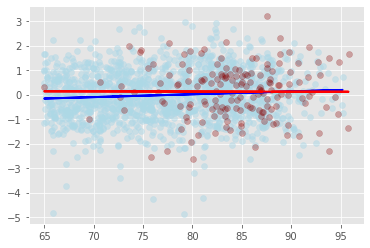

In [6]:
# n for bundle/measure for plotting
n = 13
print("bundle_measure :", all_figures_std[0][n-1])
print("abs diff (0-1) :", round(all_figures_std[2][n-1],3))
all_figures_std[1][n-1]

# Saveing Normalized Data

In [7]:
# combine all bundle measures data into one data frame
std_data = pd.concat([bundle_measures_std[0][0],bundle_measures_std[0][1],bundle_measures_std[0][2],
          bundle_measures_std[0][3],bundle_measures_std[0][4],bundle_measures_std[0][5],
          bundle_measures_std[0][6],bundle_measures_std[0][7],bundle_measures_std[0][8],
          bundle_measures_std[0][9],bundle_measures_std[0][10],bundle_measures_std[0][11],
          bundle_measures_std[0][12],bundle_measures_std[0][13],bundle_measures_std[0][14],
          bundle_measures_std[0][15],bundle_measures_std[0][16],bundle_measures_std[0][17],
          bundle_measures_std[0][18],bundle_measures_std[0][19],bundle_measures_std[0][20],
          bundle_measures_std[0][21],bundle_measures_std[0][22],bundle_measures_std[0][23],
          bundle_measures_std[0][24],bundle_measures_std[0][25],bundle_measures_std[0][26],
          bundle_measures_std[0][27],bundle_measures_std[0][28],bundle_measures_std[0][29],
          bundle_measures_std[0][30],bundle_measures_std[0][31],bundle_measures_std[0][32],
          bundle_measures_std[0][33],bundle_measures_std[0][34],bundle_measures_std[0][35],
          bundle_measures_std[0][36],bundle_measures_std[0][37],bundle_measures_std[0][38],
          bundle_measures_std[0][39],bundle_measures_std[0][40],bundle_measures_std[0][41],
          bundle_measures_std[0][42],bundle_measures_std[0][43],bundle_measures_std[0][44],
          bundle_measures_std[0][45],bundle_measures_std[0][46],bundle_measures_std[0][47],
          bundle_measures_std[0][48]], axis =1)
# save data frame as 'standardized_data.csv'
std_data.to_csv('./data/standardized_data.csv', index=False)